# Table of Contents
<p>
<div class="lev1 toc-item"><a href="#Linear-Regression-problem" data-toc-modified-id="Linear-Regression-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression problem</a></div>
<div class="lev1 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></div>

In [1]:
%matplotlib inline
from fastai.learner import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

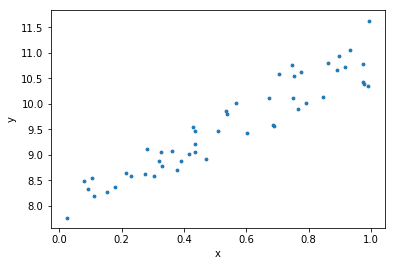

In [3]:
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [4]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [5]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.863579626962018

In [6]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [7]:
mse_loss(10, 5, x, y)

4.863579626962018

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

# Gradient Descent

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [8]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [9]:
x,y = V(x),V(y)

C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU0 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [10]:
# Create random weights a and b, and wrap them in Variables.
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a,b

(Variable containing:
  1.4959
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
  1.4661
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [11]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

RuntimeError: cuda runtime error (48) : no kernel image is available for execution on the device at c:\anaconda2\conda-bld\pytorch_1519501749874\work\torch\lib\thc\generic/THCTensorMathPointwise.cu:367

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

# ADAM

In [ ]:
# Create random weights a and b, and wrap them in Variables.
a2 = V(np.random.randn(1), requires_grad=True)
b2 = V(np.random.randn(1), requires_grad=True)
a2, b2

In [ ]:
learning_rate = 1e-3
beta1, beta2 = 0.9, 0.999
beta1exp = beta2exp = 1
m = np.zeros(2)
v = np.zeros(2)
params = [a2, b2]
e = 1e-8

for t in range(10000):
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    beta1exp *= beta1
    beta2exp *= beta2
    
    for i, p in enumerate(params):
        m[i] = beta1*m[i] + (1-beta1)*p.grad.data
        v[i] = beta2*v[i] + (1-beta2)*(p.grad.data)**2
        mhat = m[i] / (1-beta1exp)
        vhat = v[i] / (1-beta2exp)
    
        p.data = p.data - learning_rate * mhat / (vhat + e)

        p.grad.data.zero_()